# Can you make the image smile again?

In [24]:
import numpy as np
import pandas as pd
import pylab as pl

In [25]:
full_df = pd.read_csv('../dataset/full.csv')
train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')

In [27]:
len(train_df)

5000

# Here is the original image

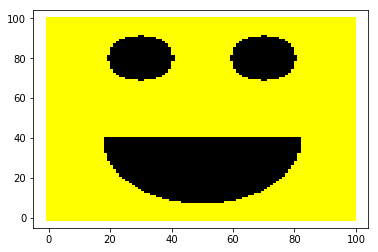

In [28]:
for color in ['yellow', 'black']:
    pl.scatter(full_df[full_df.color==color].x, full_df[full_df.color==color].y, c=color, marker=',', edgecolors='none')
pl.show()

# But I've lost some data from the image :(

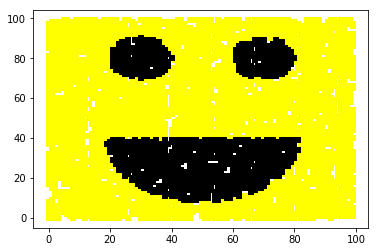

In [29]:
for color in ['yellow', 'black']:
    pl.scatter(train_df[train_df.color==color].x, train_df[train_df.color==color].y, c=color, marker=',', edgecolors='none')
pl.show()

# Can you help me recover my original image?

In [30]:
# hint: what kind of problem is this? regression/classification/clustering
train_df.head()

x   y   color
0  24  81   black
1  27  92  yellow
2  41  83  yellow
3  66  27   black
4  89  85  yellow

In [31]:
# convert target variable to 0's and 1's
model_data = pd.get_dummies(train_df, columns=['color'], drop_first=True)
model_data.head()

x   y  color_yellow
0  24  81             0
1  27  92             1
2  41  83             1
3  66  27             0
4  89  85             1

In [32]:
# define model
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=7, weights='uniform')
knn.fit(model_data[['x', 'y']], model_data['color_yellow'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [33]:
# make predictions
myoutput = knn.predict(X=test_df[['x','y']])

In [37]:
test_df['pred_color'] = myoutput
mydict = {0: 'black', 1: 'yellow'}
test_df['pred_color'] = test_df.pred_color.map(mydict)

In [40]:
test_df = test_df.merge(full_df, how='left', on=['x', 'y'])

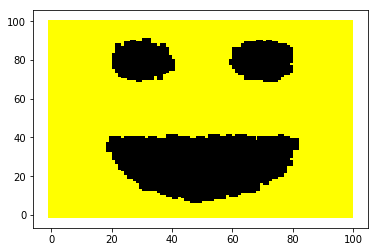

In [43]:
for color in ['yellow', 'black']:
    pl.scatter(train_df[train_df.color==color].x, train_df[train_df.color==color].y, c=color, marker=',', edgecolors='none')
for color in ['yellow', 'black']:
    pl.scatter(test_df[test_df.pred_color==color].x, test_df[test_df.pred_color==color].y, c=color, marker=',', edgecolors='none')
pl.show()


In [ ]:
# bonus: try to write code to get roc_auc_score and acuuracy!